   store_id  product_id day_of_week  season  quantity_sold  \
0        52        1165      Sunday  Spring             52   
1        93        2573      Monday  Summer             48   
2        15        4252      Monday    Fall             39   
3        72        3908    Thursday    Fall             34   
4        61        1616     Tuesday  Summer             49   

   stock_before_order  stock_after_order  order_amount  lead_time_days  \
0                 172                119            66               7   
1                 166                108            30               8   
2                 169                123            86              11   
3                 138                 18            32               6   
4                 165                 36            33               1   

   supplier_id  delivery_time_expected  delivery_time_actual transport_mode  \
0          616                       1                    13           Ship   
1          519          

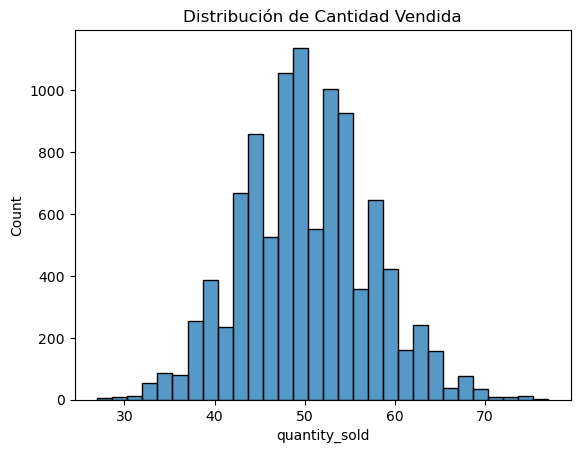

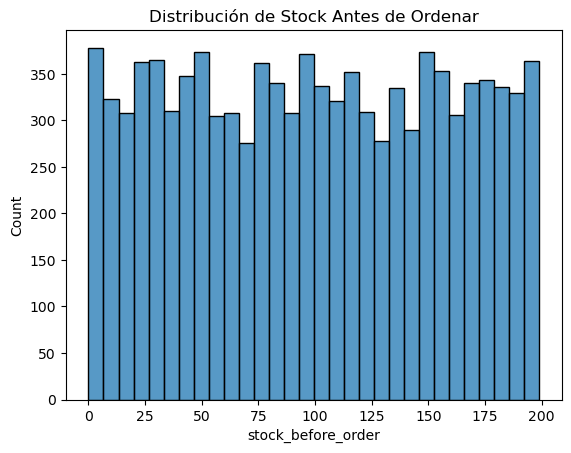

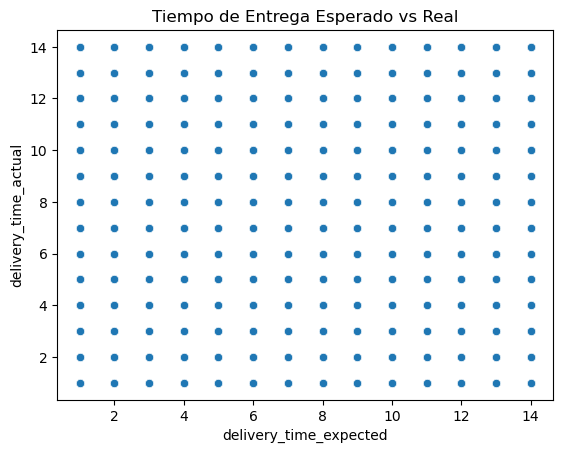

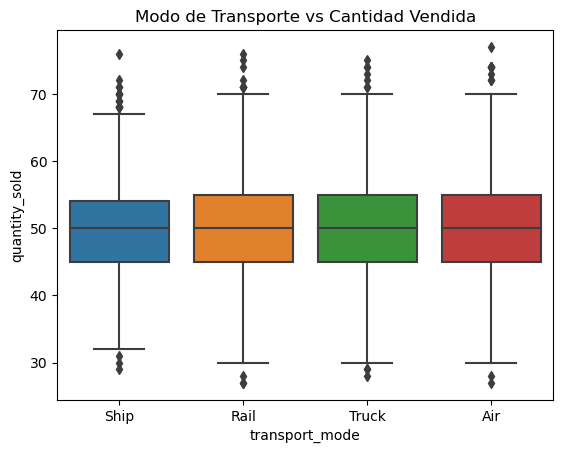

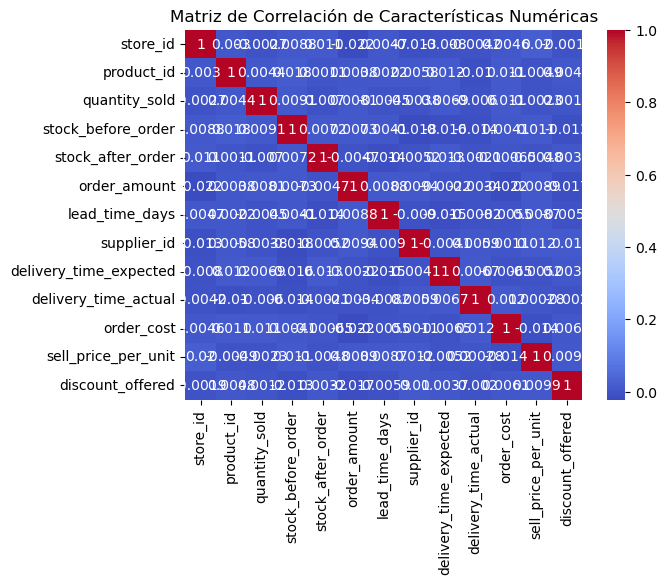

In [9]:
# Generar nuevamente el conjunto de datos ficticios para el problema 2: Optimización de la cadena de suministro en retail

# Crear un DataFrame con características relevantes para la cadena de suministro en retail
np.random.seed(42)  # Para reproducibilidad
df_supply_chain = pd.DataFrame({
    'store_id': np.random.choice(range(1, 101), size=n_samples),
    'product_id': np.random.choice(range(1000, 5000), size=n_samples),
    'day_of_week': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], size=n_samples),
    'season': np.random.choice(['Spring', 'Summer', 'Fall', 'Winter'], size=n_samples),
    'quantity_sold': np.random.poisson(lam=50, size=n_samples),
    'stock_before_order': np.random.randint(0, 200, size=n_samples),
    'stock_after_order': np.random.randint(0, 200, size=n_samples),
    'order_amount': np.random.randint(1, 100, size=n_samples),
    'lead_time_days': np.random.randint(1, 15, size=n_samples),
    'supplier_id': np.random.choice(range(500, 1000), size=n_samples),
    'delivery_time_expected': np.random.randint(1, 15, size=n_samples),
    'delivery_time_actual': np.random.randint(1, 15, size=n_samples),
    'transport_mode': np.random.choice(['Ship', 'Truck', 'Air', 'Rail'], size=n_samples),
    'order_cost': np.random.uniform(100, 1000, size=n_samples),
    'sell_price_per_unit': np.random.uniform(10, 100, size=n_samples),
    'discount_offered': np.random.uniform(0, 0.3, size=n_samples),  # Hasta un 30% de descuento
})

# Realizar EDA para el conjunto de datos de la cadena de suministro en retail
# Análisis básico de los datos
print(df_supply_chain.head())
print(df_supply_chain.describe())
print(df_supply_chain.info())

# Revisar balanceo de las variables categóricas
print(df_supply_chain['day_of_week'].value_counts())
print(df_supply_chain['season'].value_counts())
print(df_supply_chain['transport_mode'].value_counts())

# Visualización de las distribuciones de algunas características numéricas
sns.histplot(df_supply_chain['quantity_sold'], kde=False, bins=30)
plt.title('Distribución de Cantidad Vendida')
plt.show()

sns.histplot(df_supply_chain['stock_before_order'], kde=False, bins=30)
plt.title('Distribución de Stock Antes de Ordenar')
plt.show()

# Visualización de la relación entre el tiempo de entrega esperado y el real
sns.scatterplot(x='delivery_time_expected', y='delivery_time_actual', data=df_supply_chain)
plt.title('Tiempo de Entrega Esperado vs Real')
plt.show()

# Visualización de la relación entre la cantidad vendida y el modo de transporte
sns.boxplot(x='transport_mode', y='quantity_sold', data=df_supply_chain)
plt.title('Modo de Transporte vs Cantidad Vendida')
plt.show()

# Correlación entre las características numéricas
corr_matrix = df_supply_chain.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Características Numéricas')
plt.show()

# Continuaremos con el preprocesamiento y modelado después del EDA.


   store_id  product_id day_of_week  season  quantity_sold  \
0        52        1165      Sunday  Spring             52   
1        93        2573      Monday  Summer             48   
2        15        4252      Monday    Fall             39   
3        72        3908    Thursday    Fall             34   
4        61        1616     Tuesday  Summer             49   

   stock_before_order  stock_after_order  order_amount  lead_time_days  \
0                 172                119            66               7   
1                 166                108            30               8   
2                 169                123            86              11   
3                 138                 18            32               6   
4                 165                 36            33               1   

   supplier_id  delivery_time_expected  delivery_time_actual transport_mode  \
0          616                       1                    13           Ship   
1          519          

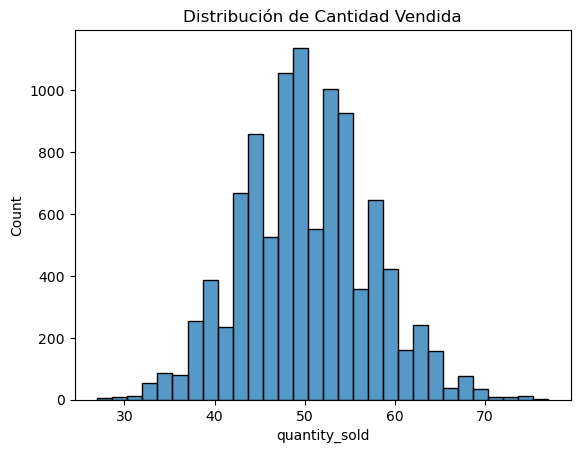

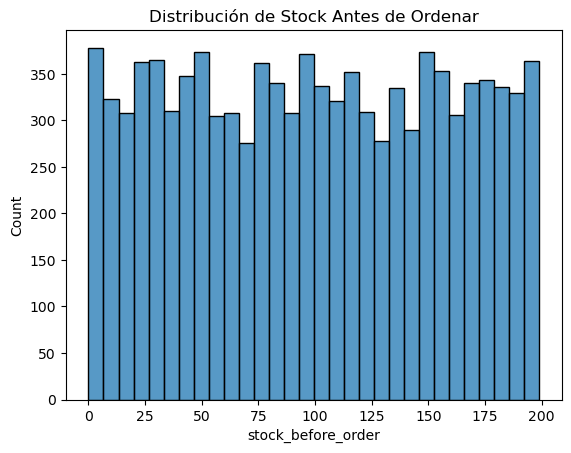

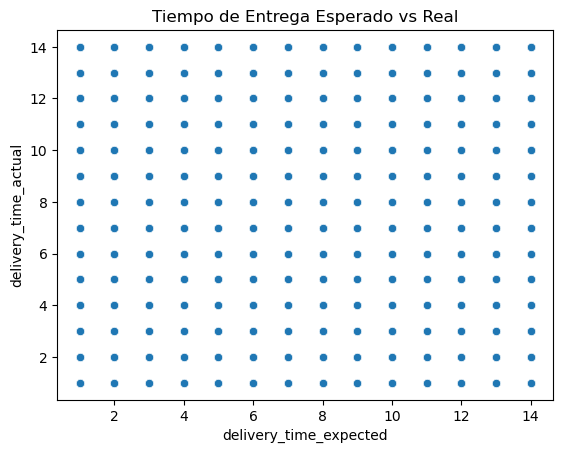

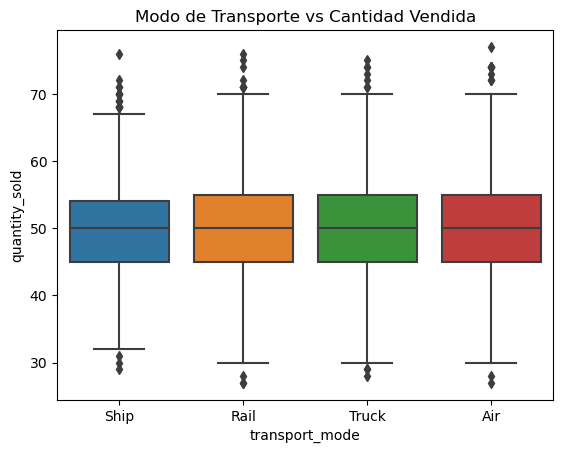

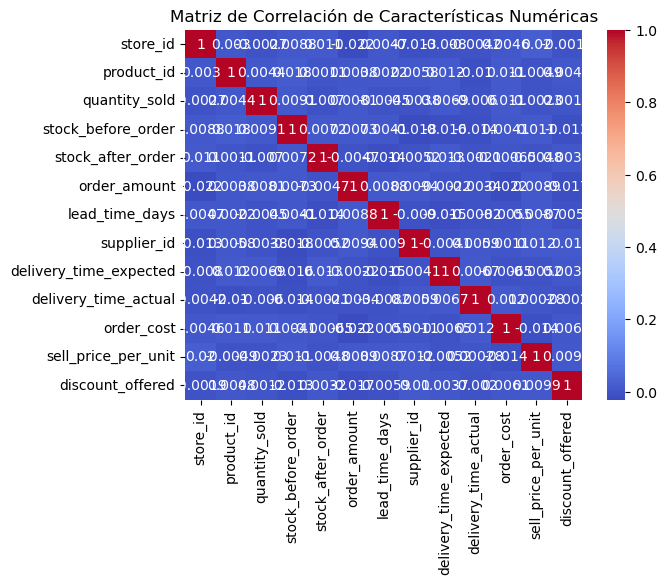

In [10]:
# Generar nuevamente el conjunto de datos ficticios para el problema 2: Optimización de la cadena de suministro en retail

# Crear un DataFrame con características relevantes para la cadena de suministro en retail
np.random.seed(42)  # Para reproducibilidad
df_supply_chain = pd.DataFrame({
    'store_id': np.random.choice(range(1, 101), size=n_samples),
    'product_id': np.random.choice(range(1000, 5000), size=n_samples),
    'day_of_week': np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], size=n_samples),
    'season': np.random.choice(['Spring', 'Summer', 'Fall', 'Winter'], size=n_samples),
    'quantity_sold': np.random.poisson(lam=50, size=n_samples),
    'stock_before_order': np.random.randint(0, 200, size=n_samples),
    'stock_after_order': np.random.randint(0, 200, size=n_samples),
    'order_amount': np.random.randint(1, 100, size=n_samples),
    'lead_time_days': np.random.randint(1, 15, size=n_samples),
    'supplier_id': np.random.choice(range(500, 1000), size=n_samples),
    'delivery_time_expected': np.random.randint(1, 15, size=n_samples),
    'delivery_time_actual': np.random.randint(1, 15, size=n_samples),
    'transport_mode': np.random.choice(['Ship', 'Truck', 'Air', 'Rail'], size=n_samples),
    'order_cost': np.random.uniform(100, 1000, size=n_samples),
    'sell_price_per_unit': np.random.uniform(10, 100, size=n_samples),
    'discount_offered': np.random.uniform(0, 0.3, size=n_samples),  # Hasta un 30% de descuento
})

# Realizar EDA para el conjunto de datos de la cadena de suministro en retail
# Análisis básico de los datos
print(df_supply_chain.head())
print(df_supply_chain.describe())
print(df_supply_chain.info())

# Revisar balanceo de las variables categóricas
print(df_supply_chain['day_of_week'].value_counts())
print(df_supply_chain['season'].value_counts())
print(df_supply_chain['transport_mode'].value_counts())

# Visualización de las distribuciones de algunas características numéricas
sns.histplot(df_supply_chain['quantity_sold'], kde=False, bins=30)
plt.title('Distribución de Cantidad Vendida')
plt.show()

sns.histplot(df_supply_chain['stock_before_order'], kde=False, bins=30)
plt.title('Distribución de Stock Antes de Ordenar')
plt.show()

# Visualización de la relación entre el tiempo de entrega esperado y el real
sns.scatterplot(x='delivery_time_expected', y='delivery_time_actual', data=df_supply_chain)
plt.title('Tiempo de Entrega Esperado vs Real')
plt.show()

# Visualización de la relación entre la cantidad vendida y el modo de transporte
sns.boxplot(x='transport_mode', y='quantity_sold', data=df_supply_chain)
plt.title('Modo de Transporte vs Cantidad Vendida')
plt.show()

# Correlación entre las características numéricas
corr_matrix = df_supply_chain.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Características Numéricas')
plt.show()

# Continuaremos con el preprocesamiento y modelado después del EDA.
